In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = '../output/'

fontsize = 28
labelsize = 20

In [2]:
df = pd.read_csv(output_folder + "propagation_result.csv", header=None)
# df.columns = ['dataset', 'p', 'algo',  'exp','result','timestep_results', 'intervention_results']
# df = pd.read_csv(output_folder + "server/propagation_result_final.csv", header=None)
df.columns = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)

(4, 8)


,algo,dataset,exp,intervention_results,max propagation time,p,result,timestep_results
0,naive_nbr,enron,sir,NaN,1.0,0.3,"{24: [(12, 26), (19, 66), (11, 24), (15, 55), ...",NaN
1,naive_nbr,dblp,sir,NaN,1.0,0.3,"{279: [(86, 284), (77, 284), (91, 284), (91, 2...",NaN
2,naive_degree,dblp,sir,NaN,1.0,0.3,"{13: [(11, 28), (21, 48), (14, 33), (14, 37), ...",NaN
3,naive_nbr,dblp,sir_kd,NaN,1.0,0.3,"{(279, 1): [(85, 284), (79, 284), (82, 284), (...",NaN


In [3]:
import seaborn as sns 
# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set(rc={'figure.figsize':(8,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("ticks")
plt.style.use('grayscale')
lw = 3
save = False

goodname_algo = {
        'naive_nbr': 'nbr-based hyp.'
    }
df2 = df[df['exp']=='sir'].copy()
datasets = df['dataset'].unique()
for key in datasets:
    print(key)
    item = df2[df2.dataset==key].copy()
    if len(item) == 0:
        continue
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k, v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['core number', 'infected', 'algo']), ignore_index=False)
        # print(result_df) 
    # print(result_df)
    #Plot mean
    meandf = result_df.groupby(['core number', 'algo']).mean().reset_index()
    # print(meandf)
    fig, ax = plt.subplots()
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], 
    #                 data=meandf, color='k', linewidth = lw)
    sns.lineplot(x = 'core number', y = 'infected', hue='algo', label = None, data=meandf, color='k', linewidth = lw)
                    
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("#Infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    ax.get_legend().remove()
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
    # plt.title(key)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5)) 
    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_infected.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_infected.pdf")
        plt.show()
    plt.clf()

enron


DataError: No numeric types to aggregate

## (k, d) core

In [8]:
import seaborn as sns 
# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set(rc={'figure.figsize':(8,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("ticks")
plt.style.use('grayscale')
lw = 3
save = True

goodname_algo = {
        'naive_nbr': 'nbr-based hyp.'
    }
df2 = df[df['exp']=='sir_kd'].copy()
datasets = df['dataset'].unique()
for key in datasets:
    print(key)
    item = df2[df2.dataset==key].copy()
    if len(item) == 0:
        continue
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k[0], k[1], v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['k', 'd', 'infected', 'algo']), ignore_index=False)
        # print(result_df) 
    #Plot mean
    meandf = result_df.groupby(['k', 'd', 'algo']).mean().reset_index()
    # meandf['color'] = meandf.apply(lambda x: 1 - x['infected'], axis=1)
    print(meandf)
    meandf = meandf[meandf.groupby('k')['d'].transform('max') == meandf['d']]
    print()
    print(meandf)
    
    fig, ax = plt.subplots()
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], 
    #                 data=meandf, color='k', linewidth = lw)
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', label = None, data=meandf, color='k', linewidth = lw)
    # sns.heatmap(data=meandf[['k', 'd']],  cmap=meandf['infected'])               
    # plt.scatter(meandf['k'], meandf['d'], s=100, c=meandf['infected'], cmap='Greens')
    sns.lineplot(x='k', y='infected', palette='colorblind', data=meandf)
    # plt.colorbar()
    plt.xlabel('k', fontsize=fontsize)
    plt.ylabel("#infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_infected_kd.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_infected.pdf")
        plt.show()
    plt.clf()

default


AssertionError: 

In [5]:
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")
plt.style.use('grayscale')
save = True

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
only_algo = ['enron']
group_list = ['algo', 'dataset', 'p']
# group_list = ['algo',  'p']
df2 = df[df['exp']=='sir_exp2'].copy()
for key in df2.dataset.unique():
    # there should be only one result
    item = df2[df2.dataset == key].copy()
    assert item.shape[0] == 1
    if item['dataset'].values[0] in ignore_datasets:
        continue
    
    
    
    result = literal_eval(item['timestep_results'].iloc[0])
    result = [(k, v) for k in result for v in result[k]]
    result_df = pd.DataFrame(result, columns = ['core number', 'timestep of infection'])
    
    
    sns.lineplot(x = 'core number', y = 'timestep of infection',  data=result_df, color = 'k', linewidth = lw)
    plt.xlabel('Core-number of Infected nodes', fontsize=fontsize)
    plt.ylabel("Infection time", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5)) 
    # plt.title(goodname_algo[key[0]], fontsize=fontsize)
    plt.tight_layout()
    #  Add redline on the MAX_ITERATION
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_firstinf.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_firstinf.pdf")
        plt.show()
        # break
    plt.clf()

In [4]:
df_nbr = pd.read_csv("../output/propagation_result_recursive_delinner_enron_naive_nbr3.csv", header=None)
df_nbr.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results', 'num delete']
df_nbr.head()

ValueError: Length mismatch: Expected axis has 9 elements, new values have 8 elements

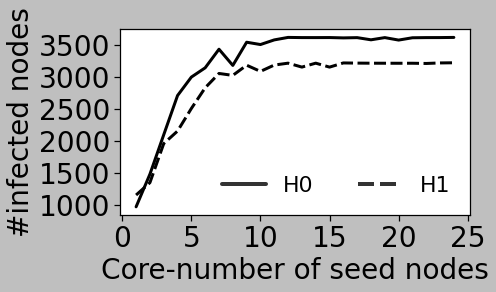

<Figure size 504x288 with 0 Axes>

In [7]:
import pandas as pd
import seaborn as sns 
from ast import literal_eval
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("ticks")
plt.style.use('grayscale')
save = True

# plt.rcParams["font.family"] = "serif"
# plt.rcParams['text.usetex'] = True


# fontsize = 28
# labelsize = 12


# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
# plt.rcParams['figure.figsize'] = (8, 4)
lw = 3
save = True
topk = 5 

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
group_list = ['dataset', 'p', 'algo']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

# df = pd.read_csv(os.path.join("data/output/propagation_result_topk_exp3.csv"), header=None)
# df.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']
# print(df.shape)
# print(df.head(10))
df2 = df_nbr[df_nbr['exp']=='sir_exp3'].copy()
for key in df2.dataset.unique():
    # there should be only one result
    item = df2[df2.dataset == key].copy()
    item['algo'] = item['algo'].replace(goodname_algo)
    assert len(item['algo'].unique()) == 1
    
    result = literal_eval(item['intervention_results'].iloc[0])
    # print(result.keys())
    # print(result['top5'].keys())
    # print(len(result['top5'][1]))
    # for top_val in ['top5', 'top10', 'top15']:
    # print(['nill', top_val])
    
    
    result_df = pd.DataFrame()
    result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk] \
                    for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
    result_df = result_df.append(pd.DataFrame(result_tuple, columns = ['hypergraph', 'core number', 'infected']), \
                                 ignore_index=False)
    # print(result_df['edge id'].unique())
    # result_df['intervention'] = result_df.apply(lambda x: 'applied' if x['edge id'] != 'nill' else 'not applied', axis=1)

    #Plot mean
    meandf = result_df.groupby(['hypergraph', 'core number']).mean().reset_index()
    # print(meandf.head(n = 10))
    # print(meandf)
    sns.lineplot(x = 'core number', y = 'infected', lw= lw, style = 'hypergraph',  data=meandf)
    
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("#infected nodes", fontsize=fontsize)
    # plt.yscale("log")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.title(goodname_algo[key[2]], fontsize=fontsize)
    leg = plt.legend(loc='best', fontsize=fontsize-6, ncol=2, frameon=False)
    
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_innercoreImpact.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_innercoreImpact.pdf")
        plt.show()
        # break 
    plt.clf()


In [8]:
from hgDecompose.utils import load_dict 
d = load_dict()

Loading dictionary from:  tests/tmp/temp.pkl


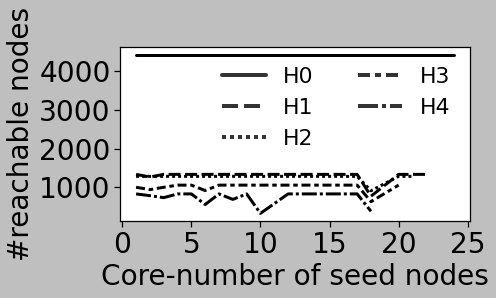

<Figure size 504x288 with 0 Axes>

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("ticks")
plt.style.use('grayscale')

lw = 3
save = True
output_folder = '../fig/'

int_dict = {'core number': [], 'Avg. conn. component size':[], 'hypergraph id': []}
for k, d2 in d.items():
    # print(k)
    if k>=5:
        break
    x = [] 
    y = []
    for k3,d3 in d2.items():
        # print('=>',k3,' : ',d3)
        mean = np.mean(list(d3.values()))
        # print()
        x.append(k3)
        y.append(mean)
    # plt.plot(x,y,label='H'+str(k))
    int_dict['core number']+= x
    int_dict['Avg. conn. component size']+=y
    int_dict['hypergraph id']+= ['H'+str(k)]*len(x)
    # print('------')
    # mean2  = np.mean(y)
    # print(k,mean2)

result_df = pd.DataFrame.from_dict(int_dict)

# result_df.head()
sns.lineplot(x = 'core number', y = 'Avg. conn. component size', lw=lw, style = 'hypergraph id',  data=result_df)
# plt.yscale('log')
plt.ylabel('#reachable nodes', fontsize=fontsize)
plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
leg = plt.legend(loc='best', fontsize=fontsize-6, ncol=2, frameon=False)
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
plt.tight_layout()
filename = 'Explain_enron'
if(save):
    plt.savefig(output_folder + filename + "_innercoreImpact.pdf")
    plt.show()
else:
    print(output_folder + filename + "_innercoreImpact.pdf")
    plt.show()
    # break 
plt.clf()

In [3]:

src = '../output/'
dataset = 'dblp'
cols = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time', 'num delete', 'p', 'result', 'timestep_results']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results', 'num delete']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df_nbr = pd.read_csv(src+"propagation_result_recursive_delinner_" + dataset + "_naive_nbr3.csv", header=None)
df_nbr.columns = cols

df_degree = pd.read_csv(src+"propagation_result_recursive_delinner_" + dataset + "_naive_degree3.csv", header=None)
df_degree.columns = cols

df_graph_core = pd.read_csv(src+"propagation_result_recursive_delinner_" + dataset + "_graph_core3.csv", header=None)
df_graph_core.columns = cols

df = pd.concat([df_nbr, df_degree, df_graph_core])
df.head(n=10)

,algo,dataset,exp,intervention_results,max propagation time,num delete,p,result,timestep_results
0,naive_nbr,dblp,sir_exp3,"{0: {0: [1.0, 1.0, 1.0, 1806.0, 1.0, 1668.0, 1...",NaN,-1.0,0.3,NaN,NaN
0,naive_degree,dblp,sir_exp3,"{0: {0: [1854.0, 1109.0, 1703.0, 1214.0, 1.0, ...",NaN,-1.0,0.3,NaN,NaN
0,graph_core,dblp,sir_exp3,"{0: {0: [1313.0, 1768.0, 2.0, 1858.0, 2.0, 276...",NaN,-1.0,0.3,NaN,NaN


AttributeError: 'Rectangle' object has no property 'style'

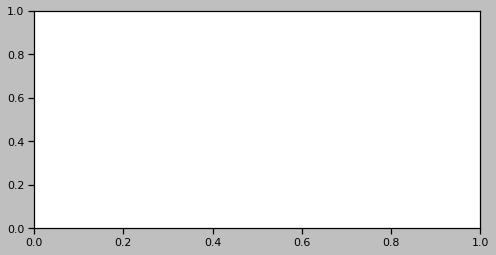

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ast import literal_eval
%matplotlib inline
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_style("ticks")
plt.style.use('grayscale')

# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize': (7, 4)})
# plt.rcParams['figure.figsize'] = (7,5)


lw = 3
save = False
output_folder = '../fig/'
topk = 5

ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                   'bin_5', 'congress', 'contact']
group_list = ['dataset', 'p', 'algo']
goodname_algo = {
    'graph_core': 'clique graph',
    'naive_nbr': 'nbr-based hyp.',
    'naive_degree': 'deg-based hyp.'
}
order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
df_plot = None

for key, item in df[df['intervention_results'].notnull()].groupby(group_list, as_index=False):

    item['algo'] = item['algo'].replace(goodname_algo)
    assert len(item['algo'].unique()) == 1

    result = literal_eval(item['intervention_results'].iloc[0])

    result_df = pd.DataFrame()
    result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk]
                    for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
    result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
                                 'hypergraph', 'core number', 'infected']), ignore_index=False)
    # Plot mean
    meandf = result_df.groupby(
        ['hypergraph', 'core number']).mean().reset_index()

    merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                         how="right", on=["core number"])
    merged_df['infected difference'] = merged_df.apply(
        lambda x: x['infected_x'] - x['infected_y'], axis=1)
    merged_df['Decomposition'] = goodname_algo[key[2]]

    merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)

    # print(merged_df)

    if(df_plot is None):
        df_plot = merged_df.copy()
    else:
        df_plot = df_plot.append(merged_df,ignore_index=True)

# print(df_plot.head(10))    
sns.barplot(x = 'core number', y = 'infected difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
plt.ylabel("Decrease in \n#infected nodes", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
leg = plt.legend(loc="best", fontsize=fontsize-6,frameon=False,bbox_to_anchor=(0.44,0.52))
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

plt.tight_layout()
filename = key[0] + "_diff_btn_H0_and_H1"
if(save):
    plt.savefig(output_folder + filename + ".pdf")
    plt.show()
else:
    print(filename)
    plt.show()
    # break
plt.clf()

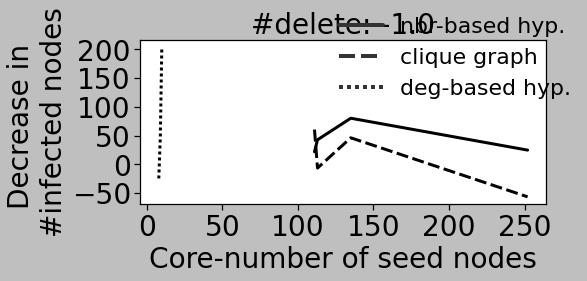

<Figure size 576x288 with 0 Axes>

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ast import literal_eval

for num_delete in df['num delete'].unique():
    %matplotlib inline
    sns.set(rc={'figure.figsize':(8,4)})
    sns.set_style("whitegrid", {'axes.grid': False})
    sns.set_style("ticks")
    plt.style.use('grayscale')

    # from matplotlib.ticker import MaxNLocator
    # sns.set(rc={'figure.figsize': (7, 4)})
    # plt.rcParams['figure.figsize'] = (7,5)


    lw = 3
    save = True
    output_folder = '../fig/'
    topk = 5

    ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                    'bin_5', 'congress', 'contact']
    group_list = ['dataset', 'p', 'algo']
    goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }
    order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
    df_plot = None

    for key, item in df[(df['intervention_results'].notnull()) & (df['num delete'] == num_delete)].groupby(group_list, as_index=False):

        # print(key)
        # print(item)
        # continue
    
        item['algo'] = item['algo'].replace(goodname_algo)
        assert len(item['algo'].unique()) == 1

        result = literal_eval(item['intervention_results'].iloc[0])

        result_df = pd.DataFrame()
        result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk]
                        for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
        result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
                                    'hypergraph', 'core number', 'infected']), ignore_index=False)
        # Plot mean
        meandf = result_df.groupby(
            ['hypergraph', 'core number']).mean().reset_index()

        merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                            how="right", on=["core number"])
        merged_df['infected difference'] = merged_df.apply(
            lambda x: x['infected_x'] - x['infected_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[key[2]]

        merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)

        # print(merged_df)

        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df,ignore_index=True)

    # # print(df_plot.head(10))    
    sns.lineplot(x = 'core number', y = 'infected difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("Decrease in \n#infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title("#delete: " + str(num_delete), fontsize=fontsize)
    leg = plt.legend(loc="best", fontsize=fontsize-6,frameon=False,bbox_to_anchor=(0.44,0.52))
    for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = key[0] + "_diff_btn_H0_and_H1"
    if(save):
        plt.savefig(output_folder + filename + ".pdf")
        plt.show()
    else:
        print(filename)
        plt.show()
        # break
    plt.clf()

In [ ]:
# 1. intersection of all methods
# 2. multiple runs
# 3. from (k, d) decomposition

../output/enron_naive_nbr_sp4.pkl
1
22
../output/enron_graph_core_sp4.pkl
1
25
../output/enron_naive_degree_sp4.pkl
1
7


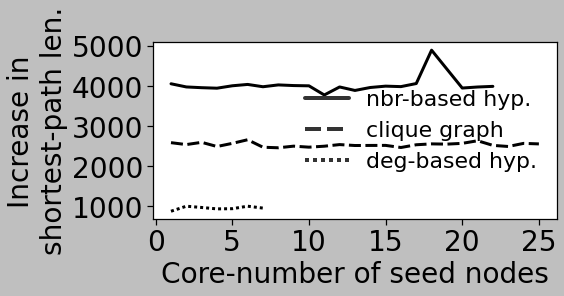

../output/enron_naive_nbr_comp4.pkl
1
22
../output/enron_graph_core_comp4.pkl
1
25
../output/enron_naive_degree_comp4.pkl
1
7


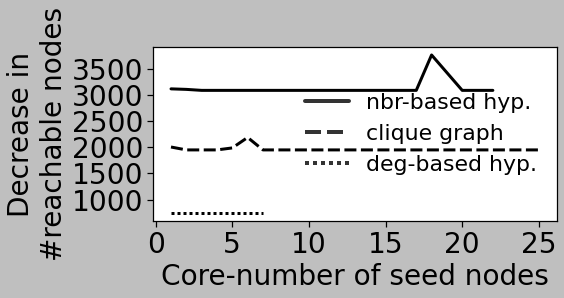

<Figure size 576x288 with 0 Axes>

In [12]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_style("ticks")
plt.style.use('grayscale')
# plt.rcParams["font.family"] = "serif"
# plt.rcParams['text.usetex'] = True


# fontsize = 28
# labelsize = 12
save = True
good_name_y = {
    "sp" : "\nshortest-path len.", 
    "comp" : "\n#reachable nodes"
}
dataset_name = 'enron'
upper_bound = {
    "sp" : 100, 
    "comp" : 4423
}

goodname_algo = {
    'graph_core': 'clique graph',
    'naive_nbr': 'nbr-based hyp.',
    'naive_degree': 'deg-based hyp.'
}
order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
# plt.rcParams['figure.figsize'] = (7,5)

# for file_extension in ["comp","sp"][-1:]:
for file_extension in ['sp', "comp"]:
    # print(file_extension)
    df_plot = None 
    for algo in ['naive_nbr','graph_core', 'naive_degree']:
        file = open("../output/"+dataset_name+"_" + algo + "_" + file_extension + "4.pkl", "rb")
        print("../output/"+dataset_name+"_" + algo + "_" + file_extension + "4.pkl")
        result = pickle.load(file)
        topk = 5 # what is the meaning of this?
        result_df = pd.DataFrame()
        # result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk] for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
        result_tuple = [('H'+str(hypergraph_id), k,result[hypergraph_id][k]) for hypergraph_id in sorted(list(result.keys()))[:topk] for k in result[hypergraph_id] ]
        # if (file_extension=='sp'):
        #     print(result_tuple)

        result_df = result_df.append(pd.DataFrame(result_tuple, columns = ['hypergraph', 'core number', good_name_y[file_extension]]), ignore_index=False)
        # if (file_extension == 'sp'):
        #     print(result_df)

        result_df[good_name_y[file_extension]] = result_df[good_name_y[file_extension]].apply(pd.to_numeric)
        
        # Handle infinity path length
        # if file_extension=='sp':
            # result_df[good_name_y[file_extension]] = result_df[good_name_y[file_extension]].apply(lambda x: [upper_bound[file_extension],x][x <= upper_bound[file_extension]] ) 
        
        print(result_df[result_df['hypergraph'] == "H0"]['core number'].min())
        # print()
        print(result_df[result_df['hypergraph'] == "H1"]['core number'].max())
        merged_df = pd.merge(result_df[result_df['hypergraph'] == "H0"], result_df[result_df['hypergraph'] == "H1"],
                         how="inner", on=["core number"])
        # print(merged_df)
        if file_extension == 'sp':
                merged_df['difference'] = merged_df.apply(
                lambda x:  x[good_name_y[file_extension]+'_y'] - x[good_name_y[file_extension]+'_x'], axis=1)
        else:
            merged_df['difference'] = merged_df.apply(
                lambda x: x[good_name_y[file_extension]+'_x'] - x[good_name_y[file_extension]+'_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[algo]

        merged_df.drop([good_name_y[file_extension]+'_x', good_name_y[file_extension]+'_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)
        
        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df,ignore_index=True)


        # meandf = result_df.groupby(['hypergraph', 'core number']).mean().reset_index()
        # # print(meandf)
       
        # # sns.lineplot(x = 'core number', y = good_name_y[file_extension], hue = 'hypergraph', palette='colorblind', data=meandf)
        # sns.lineplot(x = 'core number', y = good_name_y[file_extension], hue = 'hypergraph', palette='colorblind', data=result_df)
        # # plt.yscale("log")
        # plt.xlabel('Core number', fontsize=fontsize)
        # plt.ylabel(good_name_y[file_extension], fontsize=fontsize)
        # plt.xticks(fontsize=fontsize)
        # plt.yticks(fontsize=fontsize)
        # plt.title(goodname_algo[algo], fontsize=fontsize)
        # plt.tight_layout()

        # # filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
        # filename = dataset_name+"_" + algo + "_" + file_extension
        # # print(filename)
        # if(save):
        #     plt.savefig("data/output/fig/" + filename + "_explain.pdf")
        # else:
        #     print(filename)
        #     plt.show()

        # plt.clf()
    # print(df_plot)
    # sns.lineplot(x = 'core number', y = 'difference', hue='Decomposition', lw=3, palette='bright', data=df_plot)
    sns.lineplot(x = 'core number', y = 'difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    if file_extension == 'sp':
        plt.ylabel("Increase in"+good_name_y[file_extension], fontsize=fontsize)
    else:
        plt.ylabel("Decrease in"+good_name_y[file_extension], fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    leg = plt.legend(loc="center right", ncol=1, fontsize=fontsize-6, frameon=False)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    # plt.grid()
    plt.tight_layout()
    filename = dataset_name + "_" + file_extension
    if(save):
        plt.savefig(output_folder + filename + "_diff.pdf")
        plt.show()
    else:
        print(filename)
        plt.show()
        # break
    plt.clf()

# New code by Bishwa

In [1]:
import shutil
from ast import literal_eval
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

output_folder = '../output/'

fontsize = 24
labelsize = 20


In [2]:
dataset = "enron"
src = '../output/'
cols = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time', 'num delete', 'p', 'result', 'timestep_results']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results', 'num delete']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df_nbr = pd.read_csv(
    src + "propagation_result_recursive_delinner_" + dataset + "_naive_nbr3.csv", header=None)
df_nbr.columns = cols

df_degree = pd.read_csv(
    src + "propagation_result_recursive_delinner_" + dataset + "_naive_degree3.csv", header=None)
df_degree.columns = cols

df_graph_core = pd.read_csv(
    src + "propagation_result_recursive_delinner_" + dataset + "_graph_core3.csv", header=None)
df_graph_core.columns = cols

df = pd.concat([df_nbr, df_degree, df_graph_core])
df.head(n=10)


,algo,dataset,exp,intervention_results,max propagation time,num delete,p,result,timestep_results
0,naive_nbr,enron,sir_exp3,"{0: {0: [[(2992, 56, [14, 17, 24, 30, 31, 53, ...",NaN,-1.0,0.3,NaN,NaN
0,naive_degree,enron,sir_exp3,"{0: {0: [[(2497, 56, [18, 69, 92, 99, 103, 113...",NaN,-1.0,0.3,NaN,NaN
0,graph_core,enron,sir_exp3,"{0: {0: [[(2720, 56, [17, 31, 38, 99, 121, 139...",NaN,-1.0,0.3,NaN,NaN


In [3]:
len(literal_eval(df['intervention_results'].iloc[0])[0][0])

10

enron_diff_btn_H0_and_H1_-1.0
enron_diff_btn_H0_and_H1_-1.0


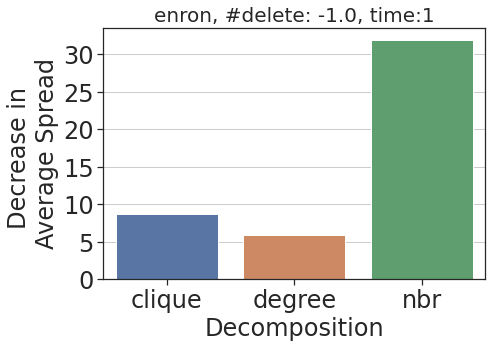

enron_diff_btn_H0_and_H1_-1.0
enron_diff_btn_H0_and_H1_-1.0


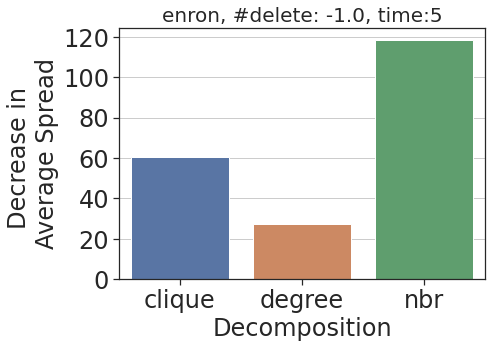

enron_diff_btn_H0_and_H1_-1.0
enron_diff_btn_H0_and_H1_-1.0


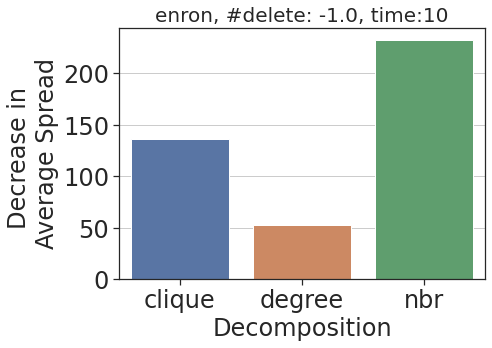

enron_diff_btn_H0_and_H1_-1.0
enron_diff_btn_H0_and_H1_-1.0


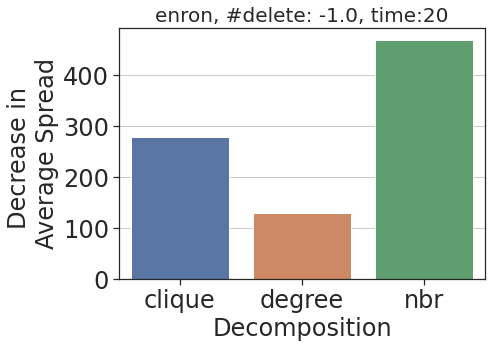

enron_diff_btn_H0_and_H1_-1.0
enron_diff_btn_H0_and_H1_-1.0


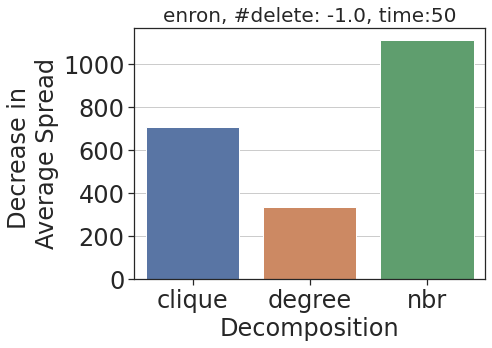

enron_diff_btn_H0_and_H1_-1.0
enron_diff_btn_H0_and_H1_-1.0


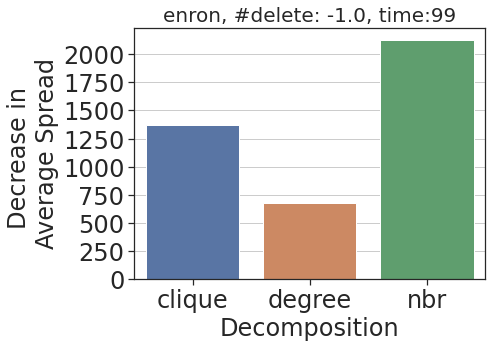

<Figure size 504x360 with 0 Axes>

In [5]:
for num_delete in df['num delete'].unique():
    sns.set(rc={'figure.figsize': (7, 5)})
    sns.set_style("whitegrid", {'axes.grid': False})
    sns.set_style("ticks")
    # plt.style.use('grayscale')

    # from matplotlib.ticker import MaxNLocator
    # sns.set(rc={'figure.figsize': (7, 4)})
    # plt.rcParams['figure.figsize'] = (7,5)

    lw = 3
    save = False
    output_folder = '../fig/'
    topk = 5

    ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                       'bin_5', 'congress', 'contact']
    group_list = ['dataset', 'p', 'algo']
    goodname_algo = {
        'graph_core': 'clique',
        'naive_nbr': 'nbr',
        'naive_degree': 'degree'
    }
    order = [goodname_algo[a]
             for a in ['naive_nbr', 'graph_core', 'naive_degree']]
    df_plot = None

    for key, item in df[(df['intervention_results'].notnull()) & (df['num delete'] == num_delete)].groupby(group_list, as_index=False):

        # print(key)
        # print(item)
        # continue

        item['algo'] = item['algo'].replace(goodname_algo)
        assert len(item['algo'].unique()) == 1

        result = literal_eval(item['intervention_results'].iloc[0])

        result_df = pd.DataFrame()
        result_tuple = [('H'+str(hypergraph_id), k, iteration, time_step, time_step_results) for hypergraph_id in sorted(list(result.keys()))[:topk]
                        for k in result[hypergraph_id] for iteration, all_iteration_results in enumerate(result[hypergraph_id][k]) for single_iteration_results in all_iteration_results for time_step, time_step_results in enumerate(single_iteration_results[2])]
        result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
            'hypergraph', 'core number', 'iteration', 'time_step','infected']), ignore_index=False)

        
        # print(result_df)
        # print()
        # Plot mean
        meandf = result_df.groupby(
            ['hypergraph', 'time_step','core number']).mean().reset_index()

        # print(meandf)
        # print()

        # sorting in descending order of core number
        meandf['core number sorted'] = meandf.apply(
            lambda x: list(-np.sort(-meandf[meandf['hypergraph'] == x['hypergraph']]['core number'])).index(x['core number']), axis=1)
        meandf['core number sorted'] = meandf.apply(
            lambda x: x['core number sorted'] + 1, axis=1)

        # print(meandf)
        merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                             how="right", on=["core number sorted", "time_step"])
        merged_df['infected difference'] = merged_df.apply(
            lambda x: x['infected_x'] - x['infected_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[key[2]]

        merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x',
                        'hypergraph_y'], axis=1, inplace=True)

        # print(merged_df)

        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df, ignore_index=True)

    for time_step in [1, 5, 10, 20, 50, 99]:
        assert len(df_plot['core number sorted'].unique()) == 1
        sns.barplot(y='infected difference',
                    x='Decomposition', data=df_plot[df_plot['time_step'] == time_step])
        plt.xlabel('Decomposition', fontsize=fontsize)
        plt.ylabel("Decrease in \nAverage Spread", fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        plt.grid(axis="y")
        plt.title(dataset + ", #delete: " + str(num_delete) +", time:" + str(time_step), fontsize=fontsize - 4)
        # leg = plt.legend(loc="best", fontsize=fontsize-6,
        #                 frameon=False, bbox_to_anchor=(0.44, 0.52))
        # for legobj in leg.legendHandles:
        #     legobj.set_linewidth(4.0)

        plt.tight_layout()
        filename = key[0] + "_diff_btn_H0_and_H1_" + str(num_delete)
        print(filename)
        # print(output_folder)
        if(save):
            plt.savefig(output_folder + filename + ".pdf")
            plt.show()
        else:
            print(filename)
            plt.show()
            # break
        plt.clf()


In [20]:
for key, item in result_df.groupby(['hypergraph', 'core number', 'iteration', 'time_step'], as_index=False):
    if(key[0] == 'H1' and key[1] == 0 and key[2] == 0 and key[3] == 1):
        # print(key)
        print(item.head(n=200))
        break
        # assert item.shape[0] == 100, str(key) + str(item.shape[0])
    else:
        continue

       hypergraph  core number  iteration  time_step  infected
100001         H1            0          0          1        12
100101         H1            0          0          1         3
100201         H1            0          0          1         5
100301         H1            0          0          1         7
100402         H1            0          0          1        12
...           ...          ...        ...        ...       ...
107947         H1            0          0          1        15
108047         H1            0          0          1        18
108147         H1            0          0          1         2
108149         H1            0          0          1         7
108178         H1            0          0          1        10

[89 rows x 5 columns]


No handles with labels found to put in legend.


   core number_x  core number sorted  core number_y  infected difference  \
0              0                   1              0                19.33   
1              0                   1              0                -1.65   
2              0                   1              0               -21.56   

  Decomposition  
0        clique  
1        degree  
2           nbr  
dblp_diff_btn_H0_and_H1_-1.0
dblp_diff_btn_H0_and_H1_-1.0


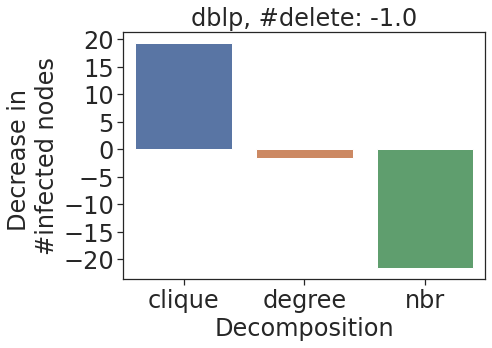

<Figure size 504x360 with 0 Axes>

In [22]:
for num_delete in df['num delete'].unique():
    sns.set(rc={'figure.figsize': (7, 5)})
    sns.set_style("whitegrid", {'axes.grid': False})
    sns.set_style("ticks")
    # plt.style.use('grayscale')

    # from matplotlib.ticker import MaxNLocator
    # sns.set(rc={'figure.figsize': (7, 4)})
    # plt.rcParams['figure.figsize'] = (7,5)

    lw = 3
    save = False
    output_folder = '../fig/'
    topk = 5

    ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                       'bin_5', 'congress', 'contact']
    group_list = ['dataset', 'p', 'algo']
    goodname_algo = {
        'graph_core': 'clique',
        'naive_nbr': 'nbr',
        'naive_degree': 'degree'
    }
    order = [goodname_algo[a]
             for a in ['naive_nbr', 'graph_core', 'naive_degree']]
    df_plot = None

    for key, item in df[(df['intervention_results'].notnull()) & (df['num delete'] == num_delete)].groupby(group_list, as_index=False):

        # print(key)
        # print(item)
        # continue

        item['algo'] = item['algo'].replace(goodname_algo)
        assert len(item['algo'].unique()) == 1

        result = literal_eval(item['intervention_results'].iloc[0])

        result_df = pd.DataFrame()
        result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk]
                        for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
        result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
            'hypergraph', 'core number', 'infected']), ignore_index=False)
        

        # Plot mean
        meandf = result_df.groupby(
            ['hypergraph', 'core number']).mean().reset_index()

        # sorting in descending order of core number
        meandf['core number sorted'] = meandf.apply(
            lambda x: list(-np.sort(-meandf[meandf['hypergraph'] == x['hypergraph']]['core number'])).index(x['core number']), axis=1)
        meandf['core number sorted'] = meandf.apply(
                lambda x: x['core number sorted'] + 1, axis=1)

        # print(meandf)
        merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                             how="right", on=["core number sorted"])
        merged_df['infected difference'] = merged_df.apply(
            lambda x: x['infected_x'] - x['infected_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[key[2]]

        merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x',
                        'hypergraph_y'], axis=1, inplace=True)

        # print(merged_df)

        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df, ignore_index=True)

    # # print(df_plot.head(10))
    # sns.lineplot(x='core number', y='infected difference',
    #              style='Decomposition', lw=lw, data=df_plot, style_order=order)
    print(df_plot)
    assert len(df_plot['core number sorted'].unique()) == 1
    sns.barplot(y='infected difference',
                x='Decomposition', data=df_plot)
    plt.xlabel('Decomposition', fontsize=fontsize)
    plt.ylabel("Decrease in \n#infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(dataset + ", #delete: " + str(num_delete), fontsize=fontsize)
    leg = plt.legend(loc="best", fontsize=fontsize-6,
                     frameon=False, bbox_to_anchor=(0.44, 0.52))
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = key[0] + "_diff_btn_H0_and_H1_" + str(num_delete)
    print(filename)
    # print(output_folder)
    if(save):
        plt.savefig(output_folder + filename + ".pdf")
        plt.show()
    else:
        print(filename)
        plt.show()
        # break
    plt.clf()


### Varying maximum propagation time

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = '../output/'

fontsize = 18
labelsize = 14

df = pd.read_csv(output_folder + "propagation_result.csv", header=None)
df.columns = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)

(3, 8)


,algo,dataset,exp,intervention_results,max propagation time,p,result,timestep_results
0,naive_nbr,dblp,sir,NaN,100.0,0.3,"{279: [(7100, 284, [87, 174, 267, 358, 430, 51...",NaN
1,naive_degree,dblp,sir,NaN,100.0,0.3,"{13: [(1996, 28, [10, 22, 22, 28, 106, 114, 18...",NaN
2,graph_core,dblp,sir,NaN,100.0,0.3,"{279: [(7105, 284, [107, 195, 299, 384, 472, 5...",NaN


dblp
('degree', 100.0, 'sir')
('graph_core', 100.0, 'sir')
('nbr', 100.0, 'sir')
../fig/dblp_infected.pdf


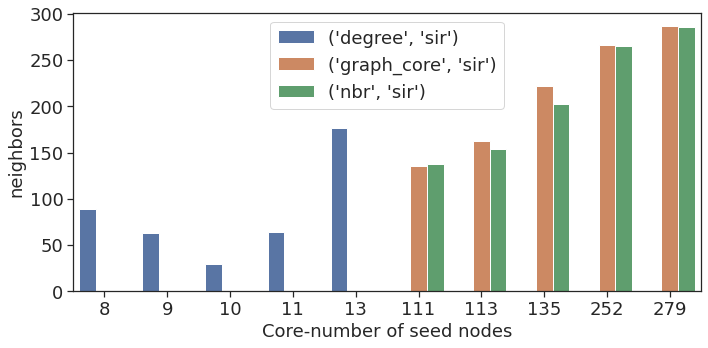

<Figure size 720x360 with 0 Axes>

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 5)})
sns.set_style("ticks")
# plt.style.use('grayscale')
lw = 3
save = False

goodname_algo = {
    'naive_nbr': 'nbr',
    'naive_degree': 'degree'
}
df2 = df.copy()
# datasets = df['dataset'].unique()
# for key in datasets:
group_list = ['dataset']
for key, item in df2.groupby(group_list, as_index=False):
    print(key)
    # item = df2[df2.dataset==key].copy()
    # if len(item) == 0:
    #     continue
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    group_list2 = ['algo', 'max propagation time', 'exp']
    for key2, item2 in item.groupby(group_list2, as_index=False):
        print(key2)
        # for algo in item['algo'].unique():
        #     for max_propagation_time in item[item['algo'] == algo]['max propagation time'].unique():
        #         print(item[(item['algo'] == algo) & (item['max propagation time'] == max_propagation_time)])
        assert item2.shape[0] == 1
        result = literal_eval(item2['result'].iloc[0])
        result = [(k[0], k[1], v[0], v[1], key2[0], key2[1], key2[2]) if isinstance(k, tuple) else
                  (k, -1, v[0], v[1], key2[0], key2[1], key2[2])
                  for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns=[
                                     'primary core number', 'secondary core number', 'infected', 'neighbors', 'algo', 'max propagation time', 'exp']), ignore_index=False)
        # print(result_df)
    # print(result_df)
    result_df = result_df[result_df.groupby(['primary core number', 'exp', 'algo'])[
        'secondary core number'].transform('max') == result_df['secondary core number']]
    # print()
    # print(result_df)
    # continue
    # Plot mean
    for max_propagation_time in result_df['max propagation time'].unique():
        for y_var in ['infected', 'neighbors'][1:]:
            meandf = result_df[result_df['max propagation time'] == max_propagation_time].groupby(
                ['primary core number', 'algo', 'exp']).mean().reset_index()
            # print(meandf)
            fig, ax = plt.subplots()
            # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'],
            #                 data=meandf, color='k', linewidth = lw)
            sns.barplot(x='primary core number', y=y_var, hue=meandf[['algo', 'exp']].apply(tuple, axis=1),
                        data=meandf)

            plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
            plt.ylabel(y_var, fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            # plt.xticks()
            plt.yticks(fontsize=fontsize)
            # plt.xlim(35, 60)
            # plt.title(key + ", max propagation time:" + str(int(max_propagation_time)), fontsize=fontsize)
            # ax.get_legend().remove()
            # handles, labels = ax.get_legend_handles_labels()
            # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
            # plt.title(key)
            # ax.yaxis.set_major_locator(MaxNLocator(5))
            # ax.xaxis.set_major_locator(MaxNLocator(5))
            plt.legend(loc='best', fontsize=fontsize)
            plt.tight_layout()
            filename = key
            if(save):
                plt.savefig("../fig/" + filename + "_" + y_var +
                            "_" + str(max_propagation_time) + ".pdf")
                print("../fig/" + filename + "_" + y_var +
                            "_" + str(max_propagation_time) + ".pdf")
                print(max_propagation_time)
                plt.show()
            else:
                print("../fig/" + filename + "_infected.pdf")
                plt.show()
            plt.clf()
        
    break


dblp


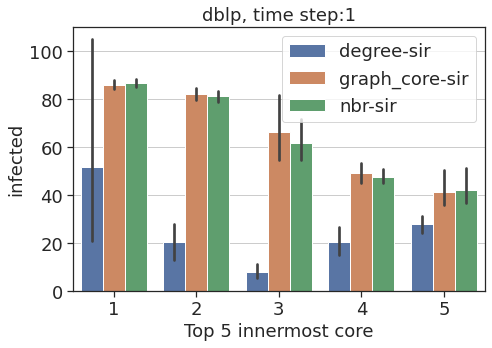

<Figure size 504x360 with 0 Axes>

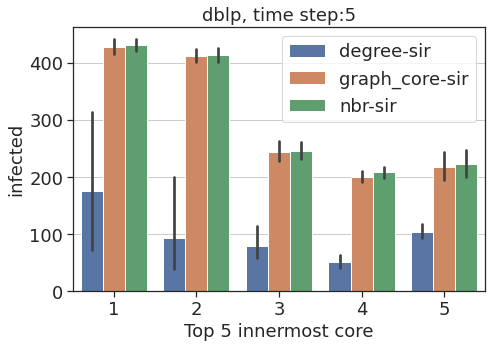

<Figure size 504x360 with 0 Axes>

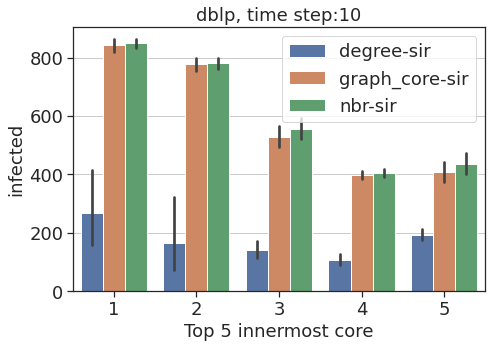

<Figure size 504x360 with 0 Axes>

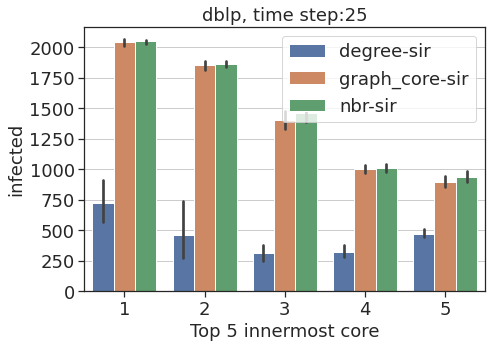

<Figure size 504x360 with 0 Axes>

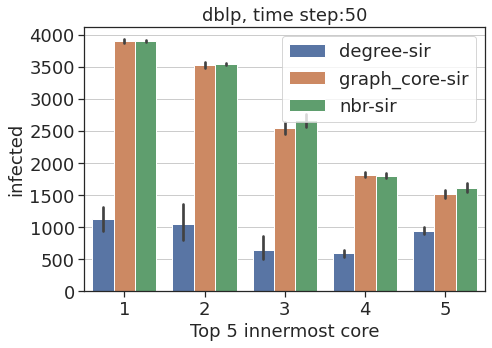

<Figure size 504x360 with 0 Axes>

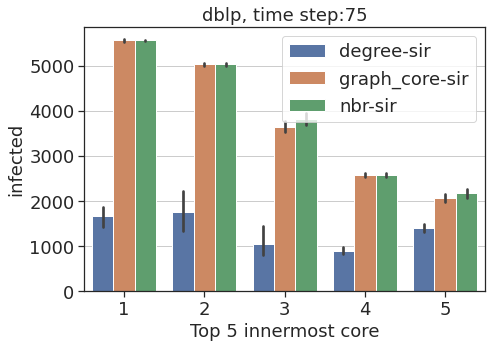

<Figure size 504x360 with 0 Axes>

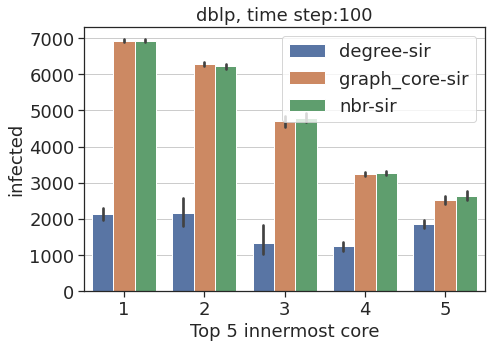

<Figure size 504x360 with 0 Axes>

In [2]:
import seaborn as sns
sns.set(rc={'figure.figsize': (7, 5)})
sns.set_style("ticks")
# plt.style.use('grayscale')
lw = 3
save = True

goodname_algo = {
    'naive_nbr': 'nbr',
    'naive_degree': 'degree'
}
df2 = df.copy()
# datasets = df['dataset'].unique()
# for key in datasets:
group_list = ['dataset']
for key, item in df2.groupby(group_list, as_index=False):
    print(key)
    # item = df2[df2.dataset==key].copy()
    # if len(item) == 0:
    #     continue
    item['algo'] = item['algo'].replace(goodname_algo)
    # result_df = pd.DataFrame()
    result_df = pd.DataFrame()
    group_list2 = ['algo', 'max propagation time', 'exp']
    for key2, item2 in item.groupby(group_list2, as_index=False):
        assert item2.shape[0] == 1
        result = literal_eval(item2['result'].iloc[0])
        result = [(k[0], k[1], v_time_detailed, key2[0] + "-" + key2[2], time_step + 1) if isinstance(k, tuple) else
                  (k, -1, v_time_detailed,
                   key2[0] + "-" + key2[2], time_step + 1)
                  for k in result for v in result[k] for time_step, v_time_detailed in enumerate(v[2])]
        result_df = result_df.append(pd.DataFrame(result, columns=[
                                     'primary core number', 'secondary core number', 'infected', 'algo-exp', 'time step']), ignore_index=False)
        # print(result_df)
    # print(result_df)
    result_df = result_df[result_df.groupby(['primary core number', 'algo-exp'])[
        'secondary core number'].transform('max') == result_df['secondary core number']]

    # print()
    # print(result_df)
    # continue
    # Plot mean
    # for time_step in result_df['time step'].unique():

    dic_sorted_core = {}
    for algo_exp in result_df['algo-exp'].unique():
        dic_sorted_core[algo_exp] = list(
            -np.sort(-result_df[result_df['algo-exp'] == algo_exp]['primary core number'].unique()))

    # print(dic_sorted_core)

    # continue
    for time_step in [1, 5, 10, 25, 50, 75, 100]:
        for y_var in ['infected']:
            # meandf = result_df[result_df['time step'] == time_step].groupby(
            #     ['primary core number', 'algo-exp']).mean().reset_index()
            # # sorting in descending order of core number
            # meandf['core number sorted'] = meandf.apply(
            #     lambda x: list(-np.sort(-meandf[meandf['algo-exp'] == x['algo-exp']]['primary core number'])).index(x['primary core number']), axis=1)
            # meandf['core number sorted'] = meandf.apply(lambda x: x['core number sorted'] + 1, axis=1)
            # # print(meandf)

            result_df['core number sorted'] = result_df.apply(
                lambda x: dic_sorted_core[x['algo-exp']].index(x['primary core number']), axis=1)
            result_df['core number sorted'] = result_df.apply(
                lambda x: x['core number sorted'] + 1, axis=1)

            fig, ax = plt.subplots()
            # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'],
            #                 data=meandf, color='k', linewidth = lw)
            sns.barplot(x='core number sorted', y=y_var,
                        hue='algo-exp', data=result_df[result_df['time step'] == time_step])

            plt.xlabel('Top 5 innermost core', fontsize=fontsize)
            plt.ylabel(y_var, fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            # plt.xticks()
            plt.yticks(fontsize=fontsize)
            # plt.xlim(35, 60)
            plt.title(key + ", time step:" +
                      str(int(time_step)), fontsize=fontsize)
            plt.grid(axis='y')
            # ax.get_legend().remove()
            # handles, labels = ax.get_legend_handles_labels()
            # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
            # plt.title(key)
            # ax.yaxis.set_major_locator(MaxNLocator(5))
            # ax.xaxis.set_major_locator(MaxNLocator(5))
            plt.legend(loc='best', fontsize=fontsize)
            # plt.ylim(0, 15)
            plt.tight_layout()
            filename = key
            if(save):
                plt.savefig("../fig/" + filename + "_" + y_var +
                            "_" + str(time_step) + ".pdf")
                plt.show()
            else:
                print("../fig/" + filename + "_infected.pdf")
                plt.show()
            plt.clf()

    break


In [2]:
# csv to pickle
import pickle


core_data_filename = "sirdata_backup/core_graph_core_dblp_h0.csv"
# get core information
core_base = {}
with open(core_data_filename) as file:
    for line in file:
        vs = line.strip().split(",")
        assert int(vs[0]) not in core_base
        core_base[int(vs[0])] = int(vs[1])


# dump as pickle
output_fname = "tests/tmp/dblp_graph_core.pkl"
with open(output_fname, 'wb') as handle:
    pickle.dump(core_base, handle)

print("Retrieving saved file")
with open(output_fname, 'rb') as handle:
    core_base = pickle.load(handle)
    

In [6]:
# finding vertices from second innermost core
dataset = "pref"


def get_core(filename):
    # get core information
    core_to_vertex_map = {}
    distinct_cores = []
    with open(filename) as file:
        for line in file:
            vs = line.strip().split(",")
            vs = list(map(int, vs))
            if(vs[1] not in core_to_vertex_map):
                distinct_cores.append(vs[1])
                core_to_vertex_map[vs[1]] = [vs[0]]
            else:
                core_to_vertex_map[vs[1]].append(vs[0])
    # print(core_to_vertex_map)

    
    return core_to_vertex_map, distinct_cores


core_clique, distinct_core_clique = get_core(
    "sirdata_naheed_vai/core_graph_core_" + dataset + "_h0_-1.csv")
core_degree, distinct_core_degree = get_core(
    "sirdata_naheed_vai/core_naive_degree_" + dataset + "_h0_-1.csv")
core_nbr, distinct_core_nbr = get_core(
    "sirdata_naheed_vai/core_naive_nbr_" + dataset + "_h0_-1.csv")
# len(second_highest_core_clique), len(
#     second_highest_core_degree), len(second_highest_core_nbr)

distinct_core_clique.sort()
distinct_core_degree.sort()
distinct_core_nbr.sort()

In [8]:
# # second-highest core
# distinct_cores.sort()
# assert len(distinct_cores) >= 2
# second_highest_core = distinct_cores[-2]
import pandas as pd
result = []
for index in range(1, 4):
    selected_index = index

    print(index, len(core_nbr[distinct_core_nbr[-index]]), len(core_degree[distinct_core_degree[-index]]), len(core_clique[distinct_core_clique[-index]]))

#     result.append((len(core_nbr[distinct_core_nbr[-selected_index]]), 
#                     distinct_core_nbr[-selected_index], 
#                     len(core_clique[distinct_core_clique[-index]]),
#                     distinct_core_clique[-index], 
#                     len(list(set(core_nbr[distinct_core_nbr[-selected_index]]) & set(core_clique[distinct_core_clique[-index]])))))

# # print(result)
# result = pd.DataFrame(result, columns=['#nodes (nbr)', 'core number (nbr)',
#                               '#nodes (clique)', 'core number (clique)', "#common nodes"])
# result['cumulative sum'] = result['#common nodes'].cumsum()
# result

1 247 3 574
2 5908 1 6987
3 13565 1 17110


In [78]:
for i in range(1, min(len(distinct_core_clique), len(distinct_core_nbr))):
    if(len(core_nbr[distinct_core_nbr[-i]]) ==  len(list(set(core_nbr[distinct_core_nbr[-i]]) & set(core_clique[distinct_core_clique[-i]])))):
        print("100 percent overlap", i)
    else:
        print(i, len(list(set(core_nbr[distinct_core_nbr[-i]]) & set(core_clique[distinct_core_clique[-i]]))))

1 99
2 49
3 0
4 1
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0


In [79]:
# differentiating core
set(distinct_core_clique).union(set(distinct_core_nbr)).difference(set(distinct_core_clique).intersection(set(distinct_core_nbr)))

{25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}

In [80]:
74 in distinct_core_clique, 74 in distinct_core_nbr

(False, False)

In [92]:
all_nodes = []
for i in range(len(distinct_core_clique)):
    all_nodes += core_clique[distinct_core_clique[i]]
len(set(all_nodes))

4423

In [7]:
all_nodes = []
for i in range(len(distinct_core_nbr)):
    all_nodes += core_nbr[distinct_core_nbr[i]]
len(set(all_nodes))

1836596

In [8]:
all_nodes = []
for i in range(len(distinct_core_degree)):
    all_nodes += core_degree[distinct_core_degree[i]]
len(set(all_nodes))

1836596

In [9]:
union_set_innermost_core = set(core_nbr[distinct_core_nbr[-1]]).union(set(core_degree[distinct_core_degree[-1]])).union(set(core_clique[distinct_core_clique[-1]]))
potential_seeds = set(all_nodes).difference(union_set_innermost_core)

In [16]:
sorted_nodes = []
for c in range(1, len(distinct_core_nbr) + 1):
    for v in core_nbr[distinct_core_nbr[-c]]:
        if(v in potential_seeds):
            sorted_nodes.append(v)


In [17]:
len(sorted_nodes), len(potential_seeds)

(1836299, 1836299)

In [18]:
len(potential_seeds), len(all_nodes), len(union_set_innermost_core)

import pickle
filename = "sirdata/potential_seeds_" + dataset + ".pkl"
with open(filename, "wb") as handle:
    pickle.dump(sorted_nodes, handle)

In [24]:
import pickle
dataset = "enron"
filename_clique = "sirdata/" + dataset + "_graph_core_-1.pkl"
filename_nbr = "sirdata/" + dataset + "_naive_nbr_-1.pkl"
filename_degree = "sirdata/" + dataset + "_naive_degree_-1.pkl"

def get_neighbor(filename):
    data = None
    neighbor = None
    with open(filename, "rb") as handle:
        data = pickle.load(handle)
        assert 1 in data
        neighbor = data[1]['neighbor']
    return neighbor

neighbor_clique = get_neighbor(filename_clique)

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = '../output/'

fontsize = 18
labelsize = 14

df = pd.read_csv(output_folder + "propagation_result_9a.csv", header=None)
df.columns = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time', 'p', 'result', 'seed size', 'timestep_results']
df['seed size'] = df['seed size'].astype(int)
df['max propagation time'] = df['max propagation time'].astype(int)
print(df.shape)
df.head(15)

(60, 9)


,algo,dataset,exp,intervention_results,max propagation time,p,result,seed size,timestep_results
0,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(842, 279, [70, 184, 271, 347, 417, 512, ...",10,NaN
1,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(851, 284, [85, 174, 260, 338, 427, 521, ...",50,NaN
2,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(864, 284, [101, 192, 261, 350, 426, 510,...",100,NaN
3,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(903, 284, [89, 186, 291, 380, 474, 584, ...",200,NaN
4,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(873, 284, [82, 176, 273, 365, 445, 519, ...",300,NaN
5,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(867, 284, [79, 178, 271, 352, 445, 522, ...",400,NaN
6,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(838, 284, [70, 154, 262, 335, 418, 515, ...",1000,NaN
7,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(851, 284, [86, 175, 269, 355, 437, 520, ...",1500,NaN
8,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(815, 281, [74, 145, 229, 320, 397, 480, ...",2000,NaN
9,graph_core,dblp,sir_9a,NaN,10,0.3,"{0: [(866, 284, [94, 177, 263, 349, 423, 504, ...",3000,NaN


../fig/dblp_infected.pdf


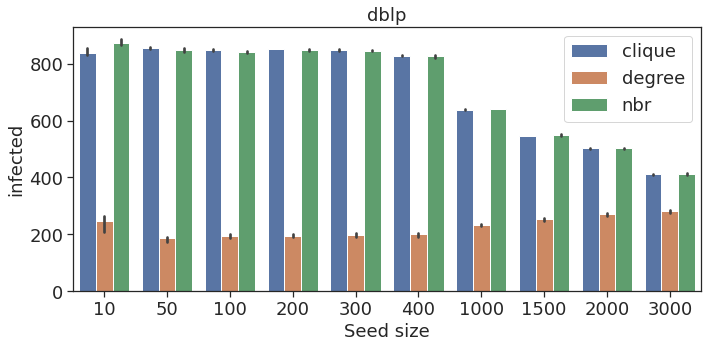

<Figure size 720x360 with 0 Axes>

In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 5)})
sns.set_style("ticks")
# plt.style.use('grayscale')
lw = 3
save = False

goodname_algo = {
    'naive_nbr': 'nbr',
    'naive_degree': 'degree',
    'graph_core' : 'clique'
}
df2 = df.copy()
group_list = ['dataset']
for key, item in df2.groupby(group_list, as_index=False):
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    group_list2 = ['algo', 'max propagation time', 'exp', 'seed size']
    for key2, item2 in item.groupby(group_list2, as_index=False):
        assert item2.shape[0] == 1
        result = literal_eval(item2['result'].iloc[0])
        result = [(k, item2['seed size'].item(), v[0], v[1], key2[0], key2[1], key2[2])
                  for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns=[
                                     'iteration', 'seed size', 'infected', 'neighbors', 'algo', 'max propagation time', 'exp']), ignore_index=False)


    # print(result_df)
    result_df = result_df.groupby(['iteration', 'seed size', 'algo', 'max propagation time' ,'exp']).mean().reset_index()
    # print(result_df)

    for y_var in ['infected', 'neighbors'][:1]:

        sns.barplot(x='seed size', y=y_var, hue='algo', data=result_df)

        plt.xlabel('Seed size', fontsize=fontsize)
        plt.ylabel(y_var, fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        plt.legend(loc='best', fontsize=fontsize)
        plt.title(key, fontsize=fontsize)
        plt.tight_layout()
        filename = key
        if(save):
            plt.savefig("../fig/" + filename + "_" + y_var + ".pdf")
            plt.show()
        else:
            print("../fig/" + filename + "_infected.pdf")
            plt.show()
        plt.clf()

    break


In [15]:
mean_df = result_df.groupby(['seed size', 'algo', 'max propagation time' ,'exp']).mean().reset_index()

In [16]:
mean_df[mean_df['algo'] != 'degree'][['seed size', 'algo', 'infected']]

,seed size,algo,infected
0,10,clique,837.600000
2,10,nbr,872.366667
3,50,clique,854.246667
5,50,nbr,846.640000
6,100,clique,848.940000
8,100,nbr,842.283333
9,200,clique,850.276667
11,200,nbr,847.633333
12,300,clique,847.252222
14,300,nbr,844.766667
